In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
plt.style.use('dark_background')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mumweather.csv")

In [ ]:
df

,YEAR,MO,DY,TS,T2M,T2MDEW,QV2M,PRECTOTCORR,WS50M_RANGE,WD50M,PS,ALLSKY_SFC_SW_DWN,WS2M,ALLSKY_SFC_SW_DIFF,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_PAR_TOT
0,2010,1,1,22.32,22.22,14.88,10.86,0.00,7.09,150.50,100.06,4.80,2.37,1.36,1.35,90.55
1,2010,1,2,23.93,23.96,16.52,11.84,0.26,5.63,145.69,100.22,4.47,2.46,1.86,1.30,85.20
2,2010,1,3,24.44,24.21,16.91,12.15,0.00,6.89,148.94,100.31,4.25,2.00,2.07,1.22,80.73
3,2010,1,4,23.76,23.38,16.90,12.08,0.00,5.55,136.81,100.19,4.69,2.37,1.66,1.27,86.58
4,2010,1,5,22.62,22.30,14.63,10.50,0.00,6.09,158.38,100.00,4.79,1.39,1.61,1.24,88.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,2022,12,26,21.60,21.98,15.90,11.29,0.00,2.73,152.38,100.21,4.55,1.43,1.39,1.16,80.90
4743,2022,12,27,23.78,23.67,17.32,12.45,0.00,6.23,149.56,100.26,4.64,1.73,1.28,1.27,85.02
4744,2022,12,28,23.72,24.05,14.74,10.56,0.00,6.16,125.31,100.36,4.66,1.64,1.26,1.30,85.16
4745,2022,12,29,23.12,23.72,13.87,9.95,0.00,4.30,126.44,100.51,4.87,1.48,1.14,1.41,89.80


In [ ]:
df.shape

(4747, 16)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape


(4747, 16)

In [ ]:
df.isnull()

,YEAR,MO,DY,TS,T2M,T2MDEW,QV2M,PRECTOTCORR,WS50M_RANGE,WD50M,PS,ALLSKY_SFC_SW_DWN,WS2M,ALLSKY_SFC_SW_DIFF,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_PAR_TOT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4743,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4744,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4745,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
YEAR,0
MO,0
DY,0
TS,0
T2M,0
T2MDEW,0
QV2M,0
PRECTOTCORR,0
WS50M_RANGE,0
WD50M,0


In [ ]:
df

,YEAR,MO,DY,TS,T2M,T2MDEW,QV2M,PRECTOTCORR,WS50M_RANGE,WD50M,PS,ALLSKY_SFC_SW_DWN,WS2M,ALLSKY_SFC_SW_DIFF,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_PAR_TOT
0,2010,1,1,22.32,22.22,14.88,10.86,0.00,7.09,150.50,100.06,4.80,2.37,1.36,1.35,90.55
1,2010,1,2,23.93,23.96,16.52,11.84,0.26,5.63,145.69,100.22,4.47,2.46,1.86,1.30,85.20
2,2010,1,3,24.44,24.21,16.91,12.15,0.00,6.89,148.94,100.31,4.25,2.00,2.07,1.22,80.73
3,2010,1,4,23.76,23.38,16.90,12.08,0.00,5.55,136.81,100.19,4.69,2.37,1.66,1.27,86.58
4,2010,1,5,22.62,22.30,14.63,10.50,0.00,6.09,158.38,100.00,4.79,1.39,1.61,1.24,88.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,2022,12,26,21.60,21.98,15.90,11.29,0.00,2.73,152.38,100.21,4.55,1.43,1.39,1.16,80.90
4743,2022,12,27,23.78,23.67,17.32,12.45,0.00,6.23,149.56,100.26,4.64,1.73,1.28,1.27,85.02
4744,2022,12,28,23.72,24.05,14.74,10.56,0.00,6.16,125.31,100.36,4.66,1.64,1.26,1.30,85.16
4745,2022,12,29,23.12,23.72,13.87,9.95,0.00,4.30,126.44,100.51,4.87,1.48,1.14,1.41,89.80


In [ ]:
df

,YEAR,MO,DY,TS,T2M,T2MDEW,QV2M,PRECTOTCORR,WS50M_RANGE,WD50M,PS,ALLSKY_SFC_SW_DWN,WS2M,ALLSKY_SFC_SW_DIFF,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_PAR_TOT
0,2010,1,1,22.32,22.22,14.88,10.86,0.00,7.09,150.50,100.06,4.80,2.37,1.36,1.35,90.55
1,2010,1,2,23.93,23.96,16.52,11.84,0.26,5.63,145.69,100.22,4.47,2.46,1.86,1.30,85.20
2,2010,1,3,24.44,24.21,16.91,12.15,0.00,6.89,148.94,100.31,4.25,2.00,2.07,1.22,80.73
3,2010,1,4,23.76,23.38,16.90,12.08,0.00,5.55,136.81,100.19,4.69,2.37,1.66,1.27,86.58
4,2010,1,5,22.62,22.30,14.63,10.50,0.00,6.09,158.38,100.00,4.79,1.39,1.61,1.24,88.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,2022,12,26,21.60,21.98,15.90,11.29,0.00,2.73,152.38,100.21,4.55,1.43,1.39,1.16,80.90
4743,2022,12,27,23.78,23.67,17.32,12.45,0.00,6.23,149.56,100.26,4.64,1.73,1.28,1.27,85.02
4744,2022,12,28,23.72,24.05,14.74,10.56,0.00,6.16,125.31,100.36,4.66,1.64,1.26,1.30,85.16
4745,2022,12,29,23.12,23.72,13.87,9.95,0.00,4.30,126.44,100.51,4.87,1.48,1.14,1.41,89.80


In [ ]:
df['dt'] = df['YEAR'].astype(str) + '-' + df['MO'].astype(str) + '-' + df['DY'].astype(str)
df

,YEAR,MO,DY,TS,T2M,T2MDEW,QV2M,PRECTOTCORR,WS50M_RANGE,WD50M,PS,ALLSKY_SFC_SW_DWN,WS2M,ALLSKY_SFC_SW_DIFF,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_PAR_TOT,dt
0,2010,1,1,22.32,22.22,14.88,10.86,0.00,7.09,150.50,100.06,4.80,2.37,1.36,1.35,90.55,2010-1-1
1,2010,1,2,23.93,23.96,16.52,11.84,0.26,5.63,145.69,100.22,4.47,2.46,1.86,1.30,85.20,2010-1-2
2,2010,1,3,24.44,24.21,16.91,12.15,0.00,6.89,148.94,100.31,4.25,2.00,2.07,1.22,80.73,2010-1-3
3,2010,1,4,23.76,23.38,16.90,12.08,0.00,5.55,136.81,100.19,4.69,2.37,1.66,1.27,86.58,2010-1-4
4,2010,1,5,22.62,22.30,14.63,10.50,0.00,6.09,158.38,100.00,4.79,1.39,1.61,1.24,88.08,2010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,2022,12,26,21.60,21.98,15.90,11.29,0.00,2.73,152.38,100.21,4.55,1.43,1.39,1.16,80.90,2022-12-26
4743,2022,12,27,23.78,23.67,17.32,12.45,0.00,6.23,149.56,100.26,4.64,1.73,1.28,1.27,85.02,2022-12-27
4744,2022,12,28,23.72,24.05,14.74,10.56,0.00,6.16,125.31,100.36,4.66,1.64,1.26,1.30,85.16,2022-12-28
4745,2022,12,29,23.12,23.72,13.87,9.95,0.00,4.30,126.44,100.51,4.87,1.48,1.14,1.41,89.80,2022-12-29


In [ ]:
df['dt'] = pd.to_datetime(df['dt'])
df

,YEAR,MO,DY,TS,T2M,T2MDEW,QV2M,PRECTOTCORR,WS50M_RANGE,WD50M,PS,ALLSKY_SFC_SW_DWN,WS2M,ALLSKY_SFC_SW_DIFF,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_PAR_TOT,dt
0,2010,1,1,22.32,22.22,14.88,10.86,0.00,7.09,150.50,100.06,4.80,2.37,1.36,1.35,90.55,2010-01-01
1,2010,1,2,23.93,23.96,16.52,11.84,0.26,5.63,145.69,100.22,4.47,2.46,1.86,1.30,85.20,2010-01-02
2,2010,1,3,24.44,24.21,16.91,12.15,0.00,6.89,148.94,100.31,4.25,2.00,2.07,1.22,80.73,2010-01-03
3,2010,1,4,23.76,23.38,16.90,12.08,0.00,5.55,136.81,100.19,4.69,2.37,1.66,1.27,86.58,2010-01-04
4,2010,1,5,22.62,22.30,14.63,10.50,0.00,6.09,158.38,100.00,4.79,1.39,1.61,1.24,88.08,2010-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,2022,12,26,21.60,21.98,15.90,11.29,0.00,2.73,152.38,100.21,4.55,1.43,1.39,1.16,80.90,2022-12-26
4743,2022,12,27,23.78,23.67,17.32,12.45,0.00,6.23,149.56,100.26,4.64,1.73,1.28,1.27,85.02,2022-12-27
4744,2022,12,28,23.72,24.05,14.74,10.56,0.00,6.16,125.31,100.36,4.66,1.64,1.26,1.30,85.16,2022-12-28
4745,2022,12,29,23.12,23.72,13.87,9.95,0.00,4.30,126.44,100.51,4.87,1.48,1.14,1.41,89.80,2022-12-29


In [ ]:
df.drop(['YEAR','MO','DY'],axis=1,inplace=True)

In [ ]:
df


,TS,T2M,T2MDEW,QV2M,PRECTOTCORR,WS50M_RANGE,WD50M,PS,ALLSKY_SFC_SW_DWN,WS2M,ALLSKY_SFC_SW_DIFF,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_PAR_TOT,dt
0,22.32,22.22,14.88,10.86,0.00,7.09,150.50,100.06,4.80,2.37,1.36,1.35,90.55,2010-01-01
1,23.93,23.96,16.52,11.84,0.26,5.63,145.69,100.22,4.47,2.46,1.86,1.30,85.20,2010-01-02
2,24.44,24.21,16.91,12.15,0.00,6.89,148.94,100.31,4.25,2.00,2.07,1.22,80.73,2010-01-03
3,23.76,23.38,16.90,12.08,0.00,5.55,136.81,100.19,4.69,2.37,1.66,1.27,86.58,2010-01-04
4,22.62,22.30,14.63,10.50,0.00,6.09,158.38,100.00,4.79,1.39,1.61,1.24,88.08,2010-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,21.60,21.98,15.90,11.29,0.00,2.73,152.38,100.21,4.55,1.43,1.39,1.16,80.90,2022-12-26
4743,23.78,23.67,17.32,12.45,0.00,6.23,149.56,100.26,4.64,1.73,1.28,1.27,85.02,2022-12-27
4744,23.72,24.05,14.74,10.56,0.00,6.16,125.31,100.36,4.66,1.64,1.26,1.30,85.16,2022-12-28
4745,23.12,23.72,13.87,9.95,0.00,4.30,126.44,100.51,4.87,1.48,1.14,1.41,89.80,2022-12-29


In [ ]:
df.rename(columns={
    "TS": "Timestamp",
    "T2M": "Temperature_2m",
    "T2MDEW": "Dew_Point_Temperature_2m",
    "QV2M": "Specific_Humidity_2m",
    "PRECTOTCORR": "Precipitation",
    "WS50M_RANGE": "Wind_Speed_50m_Range",
    "WD50M": "Wind_Direction_50m",
    "PS": "Surface_Pressure",
    "ALLSKY_SFC_SW_DWN": "Shortwave_Radiation_Down",
    "WS2M": "Wind_Speed_2m",
    "ALLSKY_SFC_SW_DIFF": "Shortwave_Radiation_Diffuse",
    "ALLSKY_SFC_UV_INDEX": "UV_Index",
    "ALLSKY_SFC_PAR_TOT": "Photosynthetically_Active_Radiation"
}, inplace=True)

In [ ]:
column = 'Temprature_2M'
result = adfuller(df[column])

# Display the ADF test results
print(f"ADF Statistic for {column}: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

if result[1] < 0.05:
    print(f"The time series '{column}' is stationary (reject the null hypothesis).")
else:
    print(f"The time series '{column}' is not stationary (fail to reject the null hypothesis).")

KeyError: 'Temprature_2M'

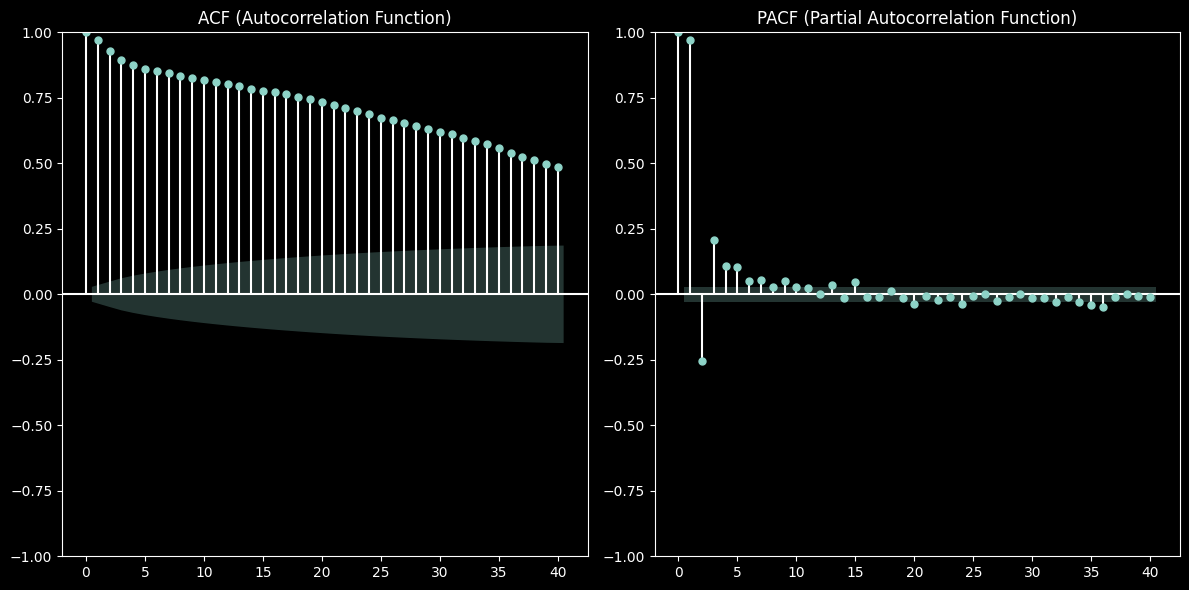

In [ ]:
Temperature2m= df['Temperature_2m']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(Temperature2m, lags=40, ax=plt.gca(), title="ACF (Autocorrelation Function)")

plt.subplot(1, 2, 2)
plot_pacf(Temperature2m, lags=40, ax=plt.gca(), title="PACF (Partial Autocorrelation Function)")

plt.tight_layout()
plt.show()

In [ ]:
temperature2m = df['Temperature_2m']

first_diff = temperature2m.diff().dropna()

result = adfuller(first_diff)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -23.5660722639237
p-value: 0.0


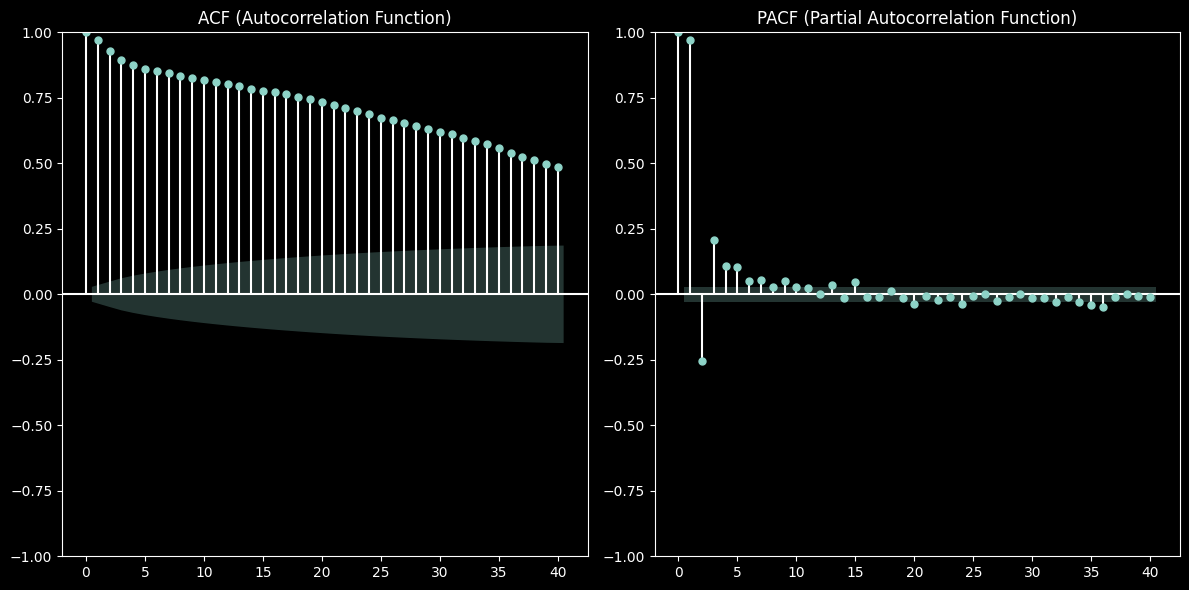

In [ ]:
Temperature2m= df['Temperature_2m']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(Temperature2m, lags=40, ax=plt.gca(), title="ACF (Autocorrelation Function)")

plt.subplot(1, 2, 2)
plot_pacf(Temperature2m, lags=40, ax=plt.gca(), title="PACF (Partial Autocorrelation Function)")

plt.tight_layout()
plt.show()

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

df = df.dropna()

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Temperature_2m'], order=(1,0,50))

model_fit = model.fit()

print(model_fit.summary())

forecast = model_fit.forecast(steps = 1000)
print(forecast)

                               SARIMAX Results                                
Dep. Variable:         Temperature_2m   No. Observations:                 4747
Model:                ARIMA(1, 0, 50)   Log Likelihood               -4603.866
Date:                Mon, 19 May 2025   AIC                           9313.731
Time:                        06:58:42   BIC                           9656.391
Sample:                             0   HQIC                          9434.144
                               - 4747                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5984      0.497     53.505      0.000      25.624      27.573
ar.L1          0.9804      0.005    216.789      0.000       0.972       0.989
ma.L1          0.2444      0.013     19.458      0.0

In [ ]:
mae = mean_absolute_error(df['Temperature_2m'], model_fit.fittedvalues)
mse = mean_squared_error(df['Temperature_2m'], model_fit.fittedvalues)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


MAE: 0.46878991041920454, MSE: 0.4109991847051796, RMSE: 0.641092181129344


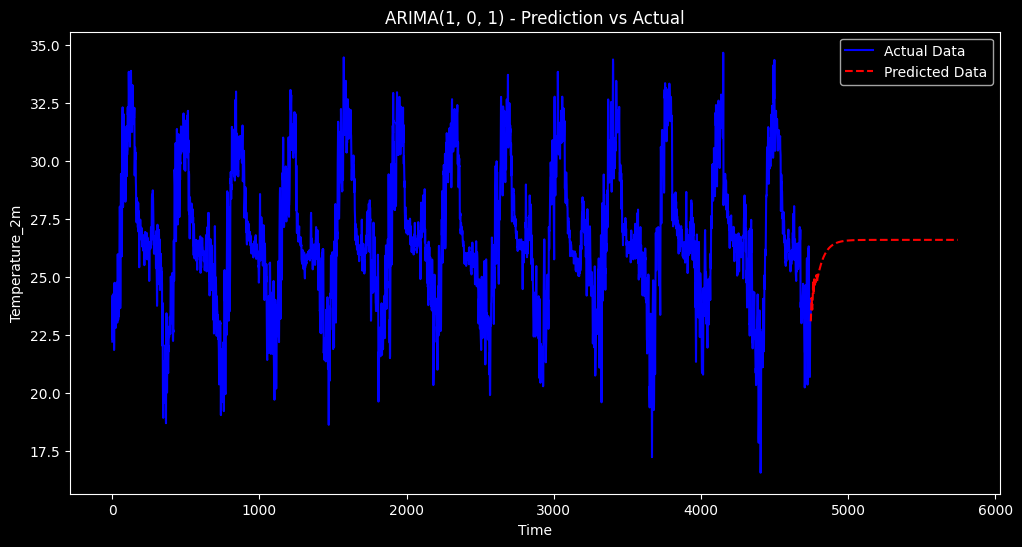

In [ ]:
temperature_2m = df['Temperature_2m']
predictions = forecast

plt.figure(figsize=(12, 6))
plt.plot(temperature_2m, label="Actual Data", color='blue')
plt.plot(predictions.index, predictions, label="Predicted Data", color='red', linestyle='--')
plt.title("ARIMA(1, 0, 1) - Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Temperature_2m")
plt.legend()
plt.show()

In [ ]:
target_column = "Temperature_2m"

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Temperature_2m']])

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30

X, y = create_dataset(scaled_data, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred = model.predict(X_test)

y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, color='blue', label='Actual Temperature')
plt.plot(y_pred_rescaled, color='red', label='Predicted Temperature')
plt.title("Temperature Prediction with LSTM")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"RMSE: {rmse}")